## Load Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

# Introduction
I have been hired to work with a government agency looking at voter registration. The purpose of this project is to look at voter registration trends in the United States comparing the first few months of 2016 voter registration and the first few months of 2020 voter registation.  Looking at the data from this notebook is important because looking at the trends to increase voter registration for the next election cycle and know where you need to put voter registration efforts.

Question 1: How does voter registration increase across the US between 2016 and 2020?

Question 2: How has voter registration trends changed in Arizona between 2016 and 2020?

##Data Processing

In [3]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


the variable names:
- Jurisdication:the state
- Year
- Month, Newly Registered Voters

Check for any missing data data

In [4]:
voters.isnull().values.any()

False

isnull() being false means there is no missing values

Check your data types

In [5]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook

In [6]:
voters = voters.rename(columns = {"Jurisdiction": "NAME", "New registered voters": "registered_voters"})

# Potential limitations of the data

Some limitations is that it's a small data set because there is only 11 states represented which could give an inaccurate look when looking at national trends. There is also only a few months worth of data for each state.

# Exploratory Data Analysis

# The highest amount of new voter registration?



In [7]:
voters.sort_values("registered_voters", ascending = False)

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281
11,California,2016,Apr,185478
14,California,2020,Mar,176810
10,California,2016,Mar,174278
88,Texas,2016,Mar,170607
...,...,...,...,...
30,Delaware,2020,Mar,2535
39,District of Columbia,2020,Mar,2225
41,District of Columbia,2020,May,1925
40,District of Columbia,2020,Apr,1281


Average voter registration?

In [8]:
mean = voters["registered_voters"].mean()
print(mean)

48223.46226415094


Creating a new datadrame showing only the above average voter registration by month

In [42]:
high_voters = voters.loc[voters.registered_voters > 48223.46]
high_voters.registered_voters.count()
high_voters.reset_index()

,index,NAME,Year,Month,registered_voters
0,1,Arizona,2016,Feb,51155
1,2,Arizona,2016,Mar,48614
2,5,Arizona,2020,Feb,50853
3,8,California,2016,Jan,87574
4,9,California,2016,Feb,103377
5,10,California,2016,Mar,174278
6,11,California,2016,Apr,185478
7,12,California,2020,Jan,151595
8,13,California,2020,Feb,238281
9,14,California,2020,Mar,176810


How many times each state went above the average


In [10]:
high_voters.value_counts("NAME")

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Top three states with the overall highest average

In [11]:
high_voters.value_counts("NAME", ascending= False).head(3)

,count
NAME,
Texas,8
California,7
Florida,7


##Data Visualization

Create a plot showing the voter registratation by state.

In [39]:
total_reg = voters.groupby("NAME")["registered_voters"].sum()
total_reg = total_reg.reset_index()

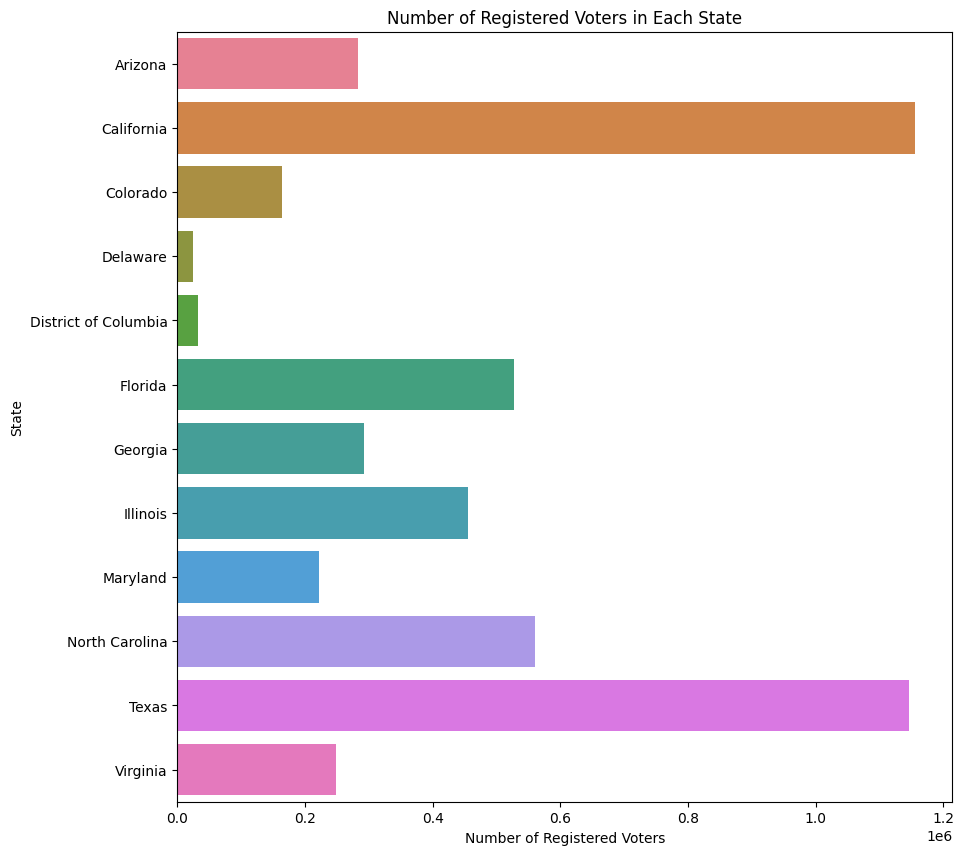

In [40]:
plt.figure(figsize = (10,10))
sns.barplot(total_reg, x = "registered_voters", y = "NAME", hue = "NAME")
plt.xlabel("Number of Registered Voters")
plt.ylabel("State")
plt.title("Number of Registered Voters in Each State")
plt.show()

A plot comparing voter registation in 2016 and 2020.

In [13]:
color = sns.color_palette("Set2")

<ipython-input-14-e7b36e0d8813>:2: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(voters, x = "Year", y = "registered_voters", palette = color, hue = "Month")


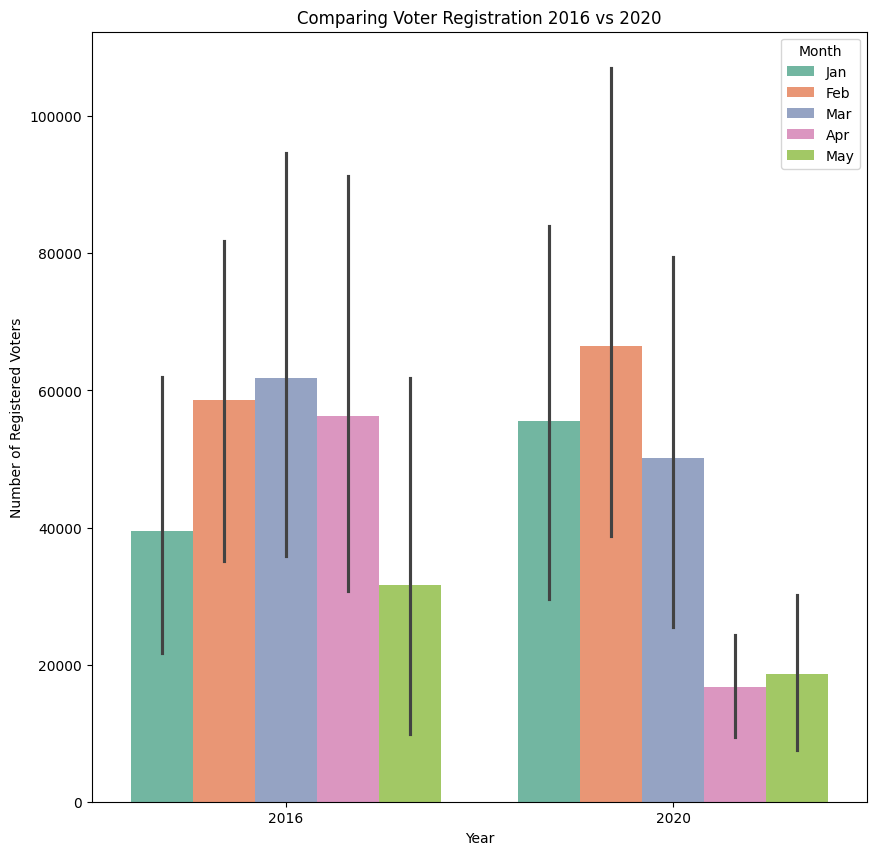

In [14]:
plt.figure(figsize = (10,10))
sns.barplot(voters, x = "Year", y = "registered_voters", palette = color, hue = "Month")
plt.ylabel("Number of Registered Voters")
plt.xlabel("Year")
plt.title("Comparing Voter Registration 2016 vs 2020")
plt.show()

A trend for both years is that voter registration dips after the first few months of the year. There is also a trend for both years that February and March have the most voter registration. However in 2020 there is a trend of the beginning of the year most people registered and it declined where as in 2016 there was more of us bell shape trend where it peaked in March.

A visualization answering research question 2

In [15]:
arizona = voters.loc[voters.NAME == "Arizona"]
arizona = arizona.reset_index()

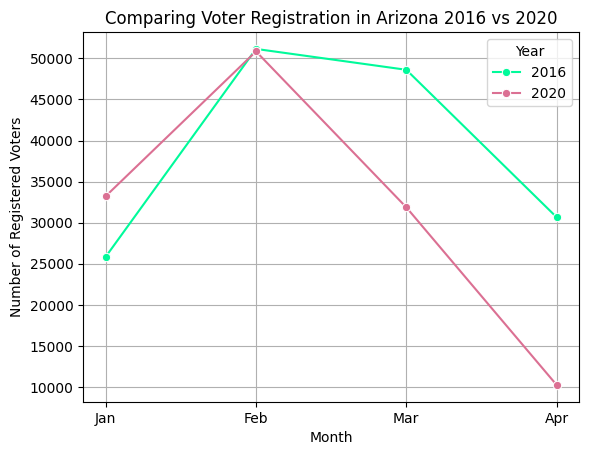

In [16]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
sns.lineplot(arizona, y = "registered_voters", x = "Month", marker = "o", hue = "Year", palette = ["#00FA9A", "#DB7093"])
plt.ylabel("Number of Registered Voters")
plt.xlabel("Month")
plt.title("Comparing Voter Registration in Arizona 2016 vs 2020")
plt.grid()
plt.show()

Looking at this graph it is answering my research question about Arizona's voting trends. This line graph shows the most people in both years registered in February. The trend of February being the peak of registration is the same for both, however in 2020 compared to 2016 there was a sharp decrease in voter registration after February.

##Mapping

Load in our shape file data from the mapping unit.

In [17]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

fatal: destination path '325-Datasets' already exists and is not an empty directory.


Set our continental US bounding box to us for the next questions.

In [18]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

bbox = states.cx[minx:maxx, miny:maxy]

Create a dataframe that shows the average voter registration per state.

In [31]:
per_state = voters.groupby("NAME")["registered_voters"].mean()
per_state = per_state.reset_index()
per_state

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


Merge the above dataframe results with the mapping data using `inner` for the `how` argument.

In [32]:
state_vote = bbox.merge(per_state, on = "NAME", how = "inner")
state_vote

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


Make a map

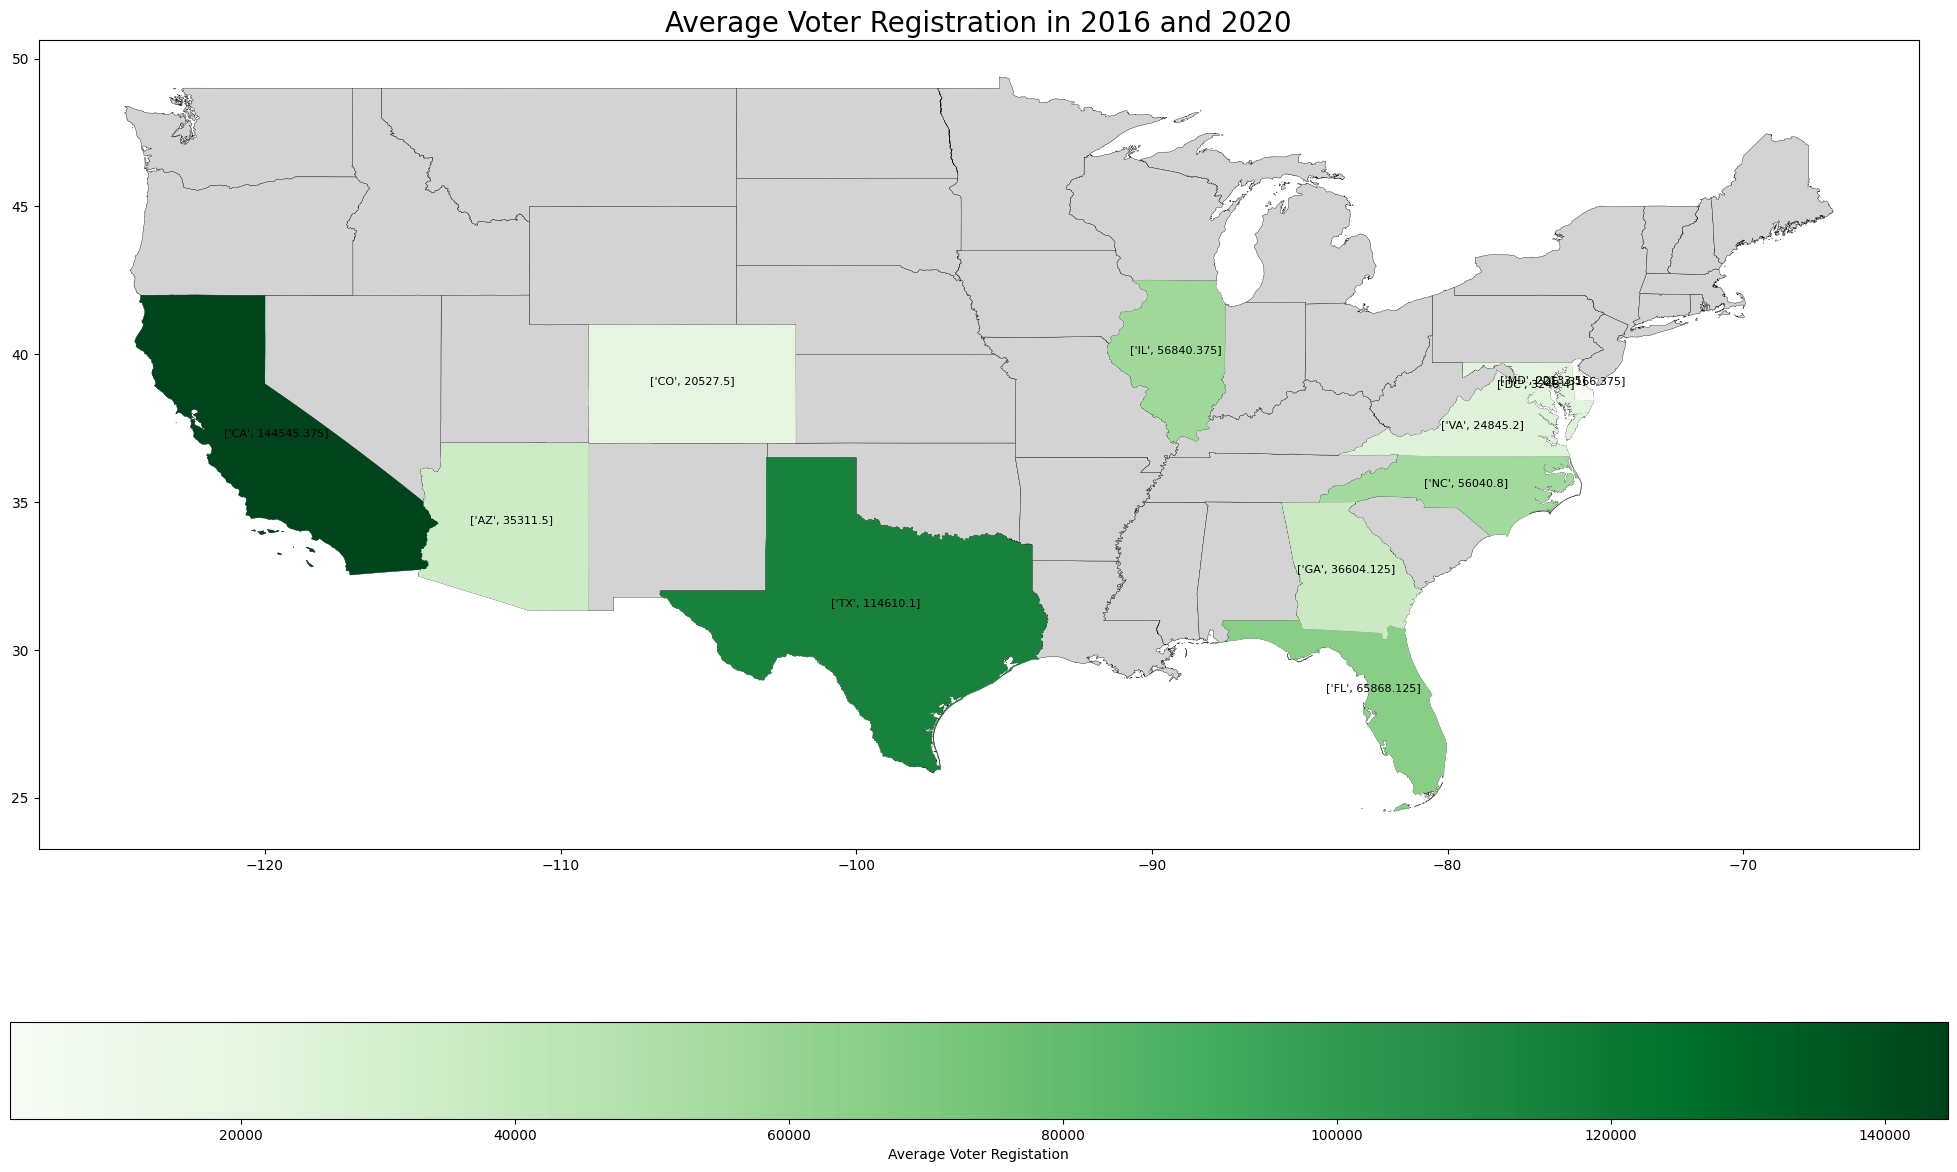

In [33]:
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
bbox.plot(ax = ax, color = "lightgray", linewidth = .25, edgecolor = "black")
state_vote.plot(column="registered_voters",ax=ax, legend=True,cmap = "Greens",
            legend_kwds={"label": "Average Voter Registation",
            "orientation": "horizontal"})
plt.title("Average Voter Registration in 2016 and 2020", fontsize = 20)
state_vote.apply(lambda x: ax.annotate(text = [x.STUSPS, x.registered_voters],
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=8),axis=1)

plt.show()

#Conclusion


## Insights
There is proportionate voter registration for state population size. In both cases there is a clear decline of voter registration after the months of March and Febraury. When looking at a case study and specifically focusing on Arizona their registration pattern follows the February peak and following decline.

## Suggestions
I would offer that there needs to be pushes for more marketing to increase voter registration across the board. There is a dip after Febraury and March that should be addressed. There could also be a higher effort for registration in states lower in population.

## Possible Next Steps
There should be more closely at all the states registration and get a better grasp on overall voter registration. This was only 11 states looked out which doesn't even represent half of the US. I think this could also be expanded to how many voters are actaully voting in each state. Then there could be a comparison of if all these registered voters are voting.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Kirsten Miller